In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [25]:
data=pd.read_excel('../product_performance_blstm\dataset_new.xlsx',sheet_name='train')
data

,KodeBarang,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,cluster
0,04121,7,9,6,9,40,0,3,0,7,...,67,77,11,57,43,50,37,21,136,0
1,18031,230,227,279,153,190,256,267,305,238,...,336,153,103,221,360,280,240,120,548,1
2,04161,102,50,45,41,71,11,52,14,66,...,21,20,7,33,21,28,30,10,18,0
3,04162,272,155,214,226,268,110,204,253,193,...,102,118,120,211,292,105,108,101,117,1
4,04163,28,28,29,52,44,21,47,15,24,...,18,23,22,16,22,31,36,17,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,04157,55,64,44,61,30,1,24,37,67,...,20,10,300,34,7,7,6,4,21,0
102,18104,46,295,83,112,70,40,18,140,97,...,47,54,27,15,57,132,66,34,146,0
103,18106,200,204,0,2,10,7,0,27,74,...,15,136,15,15,14,131,84,12,14,0
104,18092,297,418,329,70,498,59,298,376,259,...,450,498,254,260,336,493,438,408,322,1


In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [27]:
len(data['cluster'].unique())

4

In [28]:
#now lets take clusters
c0 = data.query("cluster == 0")
print("Jumlah Produk:")
print(c0['KodeBarang'].size)
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)
c2 = data.query("cluster == 2")
print("Jumlah Produk:")
print(c2['KodeBarang'].size)
c3 = data.query("cluster == 3")
print("Jumlah Produk:")
print(c3['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [29]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

In [30]:
col = c1.KodeBarang.values

In [31]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c1=c1.drop(columns=['KodeBarang','cluster'])
c1

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
1,230,227,279,153,190,256,267,305,238,519,...,85,336,153,103,221,360,280,240,120,548
3,272,155,214,226,268,110,204,253,193,217,...,112,102,118,120,211,292,105,108,101,117
5,71,100,97,147,153,100,194,93,140,131,...,92,94,116,73,154,52,78,119,75,88
7,362,314,340,278,224,305,293,178,770,570,...,394,174,266,395,392,300,411,519,422,379
19,380,677,745,395,476,298,214,311,320,422,...,23,17,26,92,28,0,0,0,0,0
20,22,99,70,77,135,328,10,76,30,16,...,380,91,217,19,227,31,32,226,33,207
24,112,141,35,39,145,15,57,63,45,90,...,626,1294,30,966,384,1017,1270,623,511,47
29,0,300,0,314,298,0,275,240,301,747,...,500,100,0,0,0,0,0,0,0,24
31,1,2,5,7,7,2,3,1,11,-2,...,164,232,307,170,240,110,232,407,265,513
32,153,112,131,128,167,97,176,191,0,324,...,104,131,86,122,161,63,90,131,108,122


<AxesSubplot:>

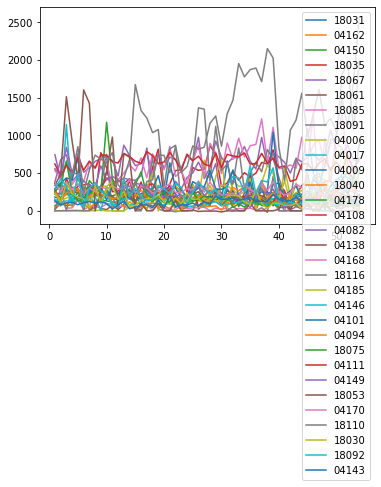

In [32]:
c1.set_index(col,inplace=True)
c1.T.plot()

In [33]:
#Ambil satu sample dari cluster 1
c1 = c1.sample()

In [34]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c1=[]
time=[]
for idx,a in enumerate(c1):
    new_c1.append(c1[a].mean())
    time.append(idx)


In [35]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c1
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [36]:
series

array([0.7920354 , 0.59292035, 0.88495575, 0.45132743, 0.88938053,
       0.54867257, 0.9380531 , 0.74336283, 0.59734513, 1.        ,
       0.6460177 , 0.44690265, 0.83185841, 0.70353982, 0.40265487,
       0.72123894, 0.52212389, 0.35840708, 0.65929204, 0.27876106,
       0.37168142, 0.42920354, 0.51769912, 0.50442478, 0.42035398,
       0.42035398, 0.34955752, 0.27433628, 0.65486726, 0.27433628,
       0.42477876, 0.64159292, 0.51327434, 0.2920354 , 0.37610619,
       0.21238938, 0.2079646 , 0.19026549, 0.2300885 , 0.01327434,
       0.        , 0.15929204, 0.10619469, 0.25663717, 0.09734513,
       0.13274336, 0.26548673, 0.24336283, 0.23451327, 0.05309735,
       0.19026549, 0.27876106, 0.21681416, 0.19469027])

In [37]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [38]:
x_valid

array([0.27876106, 0.21681416, 0.19469027])

In [39]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [40]:
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [41]:
valid_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [42]:
from keras.callbacks import  EarlyStopping
callbacks = EarlyStopping(
    min_delta=0.0001,
    
    patience=7,
    restore_best_weights=True,
)

In [43]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [44]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 2)           4         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         34304     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

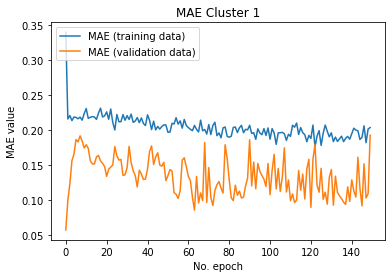

In [45]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 1")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

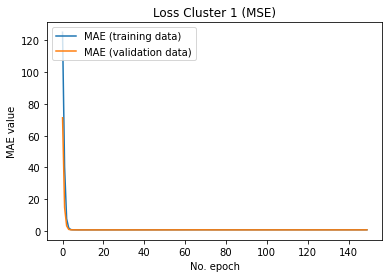

In [46]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')

plt.title("Loss Cluster 1 (MSE)")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [53]:
prediksi=model.predict(np.array(x_valid))
prediksi

array([[0.3914776 ],
       [0.3912035 ],
       [0.39110452]], dtype=float32)

In [54]:
prediksi=prediksi.flatten()

In [55]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [56]:
hasil

array([0.7920354 , 0.59292035, 0.88495575, 0.45132743, 0.88938053,
       0.54867257, 0.9380531 , 0.74336283, 0.59734513, 1.        ,
       0.6460177 , 0.44690265, 0.83185841, 0.70353982, 0.40265487,
       0.72123894, 0.52212389, 0.35840708, 0.65929204, 0.27876106,
       0.37168142, 0.42920354, 0.51769912, 0.50442478, 0.42035398,
       0.42035398, 0.34955752, 0.27433628, 0.65486726, 0.27433628,
       0.42477876, 0.64159292, 0.51327434, 0.2920354 , 0.37610619,
       0.21238938, 0.2079646 , 0.19026549, 0.2300885 , 0.01327434,
       0.        , 0.15929204, 0.10619469, 0.25663717, 0.09734513,
       0.13274336, 0.26548673, 0.24336283, 0.23451327, 0.05309735,
       0.19026549, 0.39147761, 0.39120349, 0.39110452])

[]

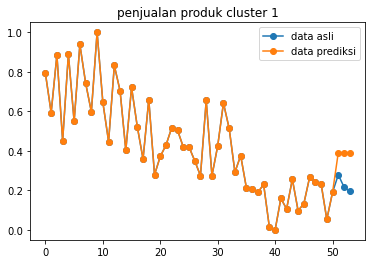

In [57]:
plt.plot(series,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 1')
plt.legend()
plt.plot()

In [58]:
model.save('cluster1_newdata.h5')